In [2]:
####数据集读取####
import pandas as pd
import os
import numpy as np

os.getcwd()
train_data=pd.read_csv('./SupplyChain.csv',encoding='unicode_escape')

print(train_data.head())
print(train_data.shape)

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goo

In [9]:

train_data['fraud']=np.where(train_data['Order Status']=='SUSPECTED_FRAUD',1,0)
train_data['late_delivery']=np.where(train_data['Delivery Status']=='Late delivery',1,0)
print(train_data['fraud'].value_counts())
print(train_data['late_delivery'].value_counts())

0    176457
1      4062
Name: fraud, dtype: int64
1    98977
0    81542
Name: late_delivery, dtype: int64


In [10]:
categorical_cols=train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Image',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [13]:
##查看value值较少的字段 是否去掉##
for column in train_data.columns:
    if len(train_data[column].value_counts())<2:
        print(column)

Customer Email
Customer Password
Product Description
Product Status


In [14]:
train_data['Product Description'].value_counts()

Series([], Name: Product Description, dtype: int64)

In [15]:
train_data['Product Status'].value_counts()

0    180519
Name: Product Status, dtype: int64

In [19]:
##去掉身份以及其他没有意义的字段##
train_data.drop(['Product Description','Product Status','Customer Email','Customer Password','Product Image',\
                 'Customer Fname','Customer Lname'],axis=1,inplace=True)

In [20]:
len(train_data.columns)

48

In [21]:
##去掉高度相关的字段##
train_data.drop(['Order Customer Id','Order Item Cardprod Id','Order Item Id','Sales per customer','Order Item Total',\
                 'Order Profit Per Order','Product Card Id','Product Category Id','Product Price'],axis=1,inplace=True)

In [22]:
len(train_data.columns)

39

In [23]:
##显示所有列
pd.set_option('display.max_columns',None)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Order Zipcode,Product Name,shipping date (DateOrders),Shipping Mode,fraud,late_delivery
0,DEBIT,3,4,91.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,77202,13.110000,0.04,327.750000,0.29,1,327.750000,Southeast Asia,Java Occidental,COMPLETE,NaN,Smart watch,2/3/2018 22:56,Standard Class,0,0
1,TRANSFER,5,4,-249.089996,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,1/13/2018 12:27,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,South Asia,Rajastán,PENDING,NaN,Smart watch,1/18/2018 12:27,Standard Class,0,1
2,CASH,4,4,-247.779999,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,1/13/2018 12:06,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,South Asia,Rajastán,CLOSED,NaN,Smart watch,1/17/2018 12:06,Standard Class,0,0
3,DEBIT,3,4,22.860001,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,1/13/2018 11:45,75937,22.940001,0.07,327.750000,0.08,1,327.750000,Oceania,Queensland,COMPLETE,NaN,Smart watch,1/16/2018 11:45,Standard Class,0,0
4,PAYMENT,2,4,134.210007,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,1/13/2018 11:24,75936,29.500000,0.09,327.750000,0.45,1,327.750000,Oceania,Queensland,PENDING_PAYMENT,NaN,Smart watch,1/15/2018 11:24,Standard Class,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,1005,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1/16/2016 3:40,26043,0.000000,0.00,399.980011,0.10,1,399.980011,Eastern Asia,Shanghái,CLOSED,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class,0,0
180515,DEBIT,3,2,-613.770019,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,9141,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,1/16/2016 1:34,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,Eastern Asia,Osaka,COMPLETE,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class,0,1
180516,TRANSFER,5,4,141.110001,Late delivery,1,45,Fishing,Bristol,EE. UU.,291,Corporate,CT,97 Burning Landing,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,1/15/2016 21:00,26024,8.000000,0.02,399.980011,0.36,1,399.980011,Oceania,Australia del Sur,PENDING,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class,0,1
180517,PAYMENT,3,4,186.229996,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,2813,Consumer,PR,2585 Silent Autumn Landing,725.0,7,Fan Shop,18.213350,-66.370575,Pacific Asia,Adelaide,Australia,1/15/2016 20:18,26022,12.000000,0.03,399.980011,0.48,1,399.980011,Oceania,Australia del Sur,PENDING_PAYMENT,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 20:18,Standard Class,0,0


In [24]:
train_data.drop(['Order Zipcode','shipping date (DateOrders)','Latitude', 'Longitude','Customer Street'],axis=1,inplace=True)


In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Delivery Status                180519 non-null  int64  
 5   Late_delivery_risk             180519 non-null  int64  
 6   Category Id                    180519 non-null  int64  
 7   Category Name                  180519 non-null  int64  
 8   Customer City                  180519 non-null  int64  
 9   Customer Country               180519 non-null  int64  
 10  Customer Id                    180519 non-null  int64  
 11  Customer Segment               180519 non-null  int64  
 12  Customer State                

In [44]:
##去掉有空值的字段##
train_data.drop(['Customer Zipcode'],axis=1,inplace=True)

In [57]:
##去掉标签泄露的字段信息##
train_data.drop(['Order Status','Delivery Status','Late_delivery_risk'],axis=1,inplace=True)

In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Category Id                    180519 non-null  int64  
 5   Category Name                  180519 non-null  int64  
 6   Customer City                  180519 non-null  int64  
 7   Customer Country               180519 non-null  int64  
 8   Customer Id                    180519 non-null  int64  
 9   Customer Segment               180519 non-null  int64  
 10  Customer State                 180519 non-null  int64  
 11  Department Id                  180519 non-null  int64  
 12  Department Name               

In [60]:
categorical_cols=train_data.select_dtypes(include='object').columns
categorical_cols
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for cat in categorical_cols:
    train_data[cat]=le.fit_transform(train_data[cat])
# train_data[categorical_cols]    

In [61]:
x_fraud=train_data.loc[:,train_data.columns!='fraud']
y_fraud=train_data['fraud']
x_fraud
x_late=train_data.loc[:,train_data.columns!='late_delivery']
y_late=train_data['late_delivery']
x_late

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Department Id,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Product Name,Shipping Mode,fraud
0,1,3,4,91.250000,73,40,66,1,20755,0,36,2,4,3,331,70,5961,77202,13.110000,0.04,327.750000,0.29,1,327.750000,15,475,78,3,0
1,3,5,4,-249.089996,73,40,66,1,19492,0,36,2,4,3,391,69,1147,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,13,841,78,3,0
2,0,4,4,-247.779999,73,40,452,0,19491,0,5,2,4,3,391,69,1146,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,13,841,78,3,0
3,1,3,4,22.860001,73,40,285,0,19490,2,5,2,4,3,3226,8,1145,75937,22.940001,0.07,327.750000,0.08,1,327.750000,11,835,78,3,0
4,2,2,4,134.210007,73,40,66,1,19489,1,36,2,4,3,3226,8,1144,75936,29.500000,0.09,327.750000,0.45,1,327.750000,11,835,78,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,45,18,59,0,1005,2,31,7,3,3,2922,31,1774,26043,0.000000,0.00,399.980011,0.10,1,399.980011,7,913,24,3,0
180515,1,3,2,-613.770019,45,18,26,0,9141,1,5,7,3,3,1362,77,1758,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,7,770,24,2,0
180516,3,5,4,141.110001,45,18,55,0,291,1,7,7,3,3,25,8,1526,26024,8.000000,0.02,399.980011,0.36,1,399.980011,11,88,24,3,0
180517,2,3,4,186.229996,45,18,66,1,2813,0,36,7,3,3,25,8,1524,26022,12.000000,0.03,399.980011,0.48,1,399.980011,11,88,24,3,0


In [62]:
##切分数据集##
from sklearn.model_selection import train_test_split
x_fraud_train,x_fraud_val,y_fraud_train,y_fraud_val=train_test_split(x_fraud,y_fraud,test_size=0.2)
x_late_train,x_late_val,y_late_train,y_late_val=train_test_split(x_late,y_late,test_size=0.2)

In [63]:
##数据规范化##
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_fraud_train=sc.fit_transform(x_fraud_train)
x_fraud_val=sc.fit_transform(x_fraud_val)

x_late_train=sc.fit_transform(x_late_train)
x_late_val=sc.fit_transform(x_late_val)

In [80]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix,f1_score
accuracy_list={}
recall_list={}
auc_list={}
f1_list={}
def model_stats(model,x_train,x_test,y_train,y_test,name='Fraud'):
    model=model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_pred,y_test)
    recall=recall_score(y_pred,y_test)
    auc=roc_auc_score(y_pred,y_test)
    f1=f1_score(y_pred,y_test)
    confusion=confusion_matrix(y_pred,y_test)
    
    accuracy_list[name,model]=accuracy
    recall_list[name,model]=recall
    auc_list[name,model]=auc
    f1_list[name,model]=f1
    
    print('Model used',model)
    print('{} Accuracy: {}% '.format(name,accuracy*100))
    print('{} Recall: {}% '.format(name,recall*100))
    print('{} AUC: {}% '.format(name,auc*100))
    print('{} F1: {}% '.format(name,f1*100))
    print('{} Confusion: {}% '.format(name,confusion))
    return accuracy,recall,f1

In [85]:
### 逻辑回归模型 ###
from sklearn.linear_model import LogisticRegression
model_fraud=LogisticRegression()
model_late=LogisticRegression()

model_stats(model_fraud,x_fraud_train,x_fraud_val,y_fraud_train,y_fraud_val,'Fraud')
model_stats(model_late,x_late_train,x_late_val,y_late_train,y_late_val,'Late Delivery')

Model used LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Fraud Accuracy: 97.82572568136494% 
Fraud Recall: 53.84615384615385% 
Fraud AUC: 76.01957182602344% 
Fraud F1: 29.08762420957543% 
Fraud Confusion: [[35158   647]
 [  138   161]]% 
Model used LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Late Delivery Accuracy: 98.90870817637935% 
Late Delivery Recall: 98.04165216959093% 
Late Delivery AUC: 99.02082608479546% 
Late Delivery F1: 99

(0.9890870817637935, 0.9804165216959093, 0.9901114345949201)

In [69]:
### 导入其他模型 ###
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor

In [74]:
###高斯朴素贝叶斯模型
model_fraud=GaussianNB()
model_late=GaussianNB()

model_stats(model_fraud,x_fraud_train,x_fraud_val,y_fraud_train,y_fraud_val,'Fraud')
model_stats(model_late,x_late_train,x_late_val,y_late_train,y_late_val,'Late Delivery')


Model used GaussianNB(priors=None, var_smoothing=1e-09)
Fraud Accuracy: 97.76202082871704% 
Fraud F1: 0.0% 
Fraud Confusion: [[35296   808]
 [    0     0]]% 
Model used GaussianNB(priors=None, var_smoothing=1e-09)
Late Delivery Accuracy: 45.36616441391536% 
Late Delivery F1: 0.0% 
Late Delivery Confusion: [[16379 19725]
 [    0     0]]% 


(0.45366164413915355, 0.0)

In [75]:
###贝努力朴素贝叶斯模型
model_fraud=BernoulliNB()
model_late=BernoulliNB()

model_stats(model_fraud,x_fraud_train,x_fraud_val,y_fraud_train,y_fraud_val,'Fraud')
model_stats(model_late,x_late_train,x_late_val,y_late_train,y_late_val,'Late Delivery')


Model used BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Fraud Accuracy: 97.76202082871704% 
Fraud F1: 0.0% 
Fraud Confusion: [[35296   808]
 [    0     0]]% 
Model used BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Late Delivery Accuracy: 69.81220917349879% 
Late Delivery F1: 67.79731127197519% 
Late Delivery Confusion: [[13732  8252]
 [ 2647 11473]]% 


(0.6981220917349878, 0.6779731127197519)

In [81]:
###SVM 模型 ###
from sklearn import svm
model_fraud=svm.LinearSVC()
model_late=svm.LinearSVC()

model_stats(model_fraud,x_fraud_train,x_fraud_val,y_fraud_train,y_fraud_val,'Fraud')
model_stats(model_late,x_late_train,x_late_val,y_late_train,y_late_val,'Late Delivery')


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model used LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Fraud Accuracy: 97.74540217150455% 
Fraud Recall: 48.95104895104895% 
Fraud AUC: 73.54303243241766% 
Fraud F1: 25.594149908592318% 
Fraud Confusion: [[35150   668]
 [  146   140]]% 
Model used LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Late Delivery Accuracy: 98.90870817637935% 
Late Delivery Recall: 98.04165216959093% 
Late Delivery AUC: 99.02082608479546% 
Late Delivery F1: 99.01114345949202% 
Late Delivery Confusion: [[15985     0]
 [  394 19725]]% 


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(0.9890870817637935, 0.9804165216959093, 0.9901114345949201)

In [82]:
accuracy_list

{('Fraud',
  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=1000,
            multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
            verbose=0)): 0.9774540217150455,
 ('Late Delivery',
  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=1000,
            multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
            verbose=0)): 0.9890870817637935}

In [88]:
###决策树 模型 ###

model_fraud=DecisionTreeClassifier()
model_late=DecisionTreeClassifier()

model_stats(model_fraud,x_fraud_train,x_fraud_val,y_fraud_train,y_fraud_val,'Fraud')
model_stats(model_late,x_late_train,x_late_val,y_late_train,y_late_val,'Late Delivery')

Model used DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Fraud Accuracy: 98.8200753379127% 
Fraud Recall: 72.79236276849642% 
Fraud AUC: 86.11545774107915% 
Fraud F1: 74.1190765492102% 
Fraud Confusion: [[35068   198]
 [  228   610]]% 
Model used DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
    

(0.9881453578550853, 0.9916433121019108, 0.9891232528589581)

In [86]:
accuracy_list

{('Fraud',
  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=1000,
            multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
            verbose=0)): 0.9774540217150455,
 ('Late Delivery',
  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=1000,
            multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
            verbose=0)): 0.9890870817637935,
 ('Fraud',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'))

In [89]:
###根据决策树模型 得到importance
important_col=model_fraud.feature_importances_.argsort()
feat_importance=pd.DataFrame({'feautrues':x_fraud.columns[important_col],'importance':model_fraud.feature_importances_[important_col]})
feat_importance

,feautrues,importance
0,Order Item Quantity,0.001774
1,Category Name,0.002011
2,Department Name,0.002185
3,Department Id,0.003595
4,Category Id,0.004087
5,Customer Country,0.005249
6,Order Item Product Price,0.005399
7,Product Name,0.005758
8,Sales,0.007824
9,Days for shipment (scheduled),0.008011


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

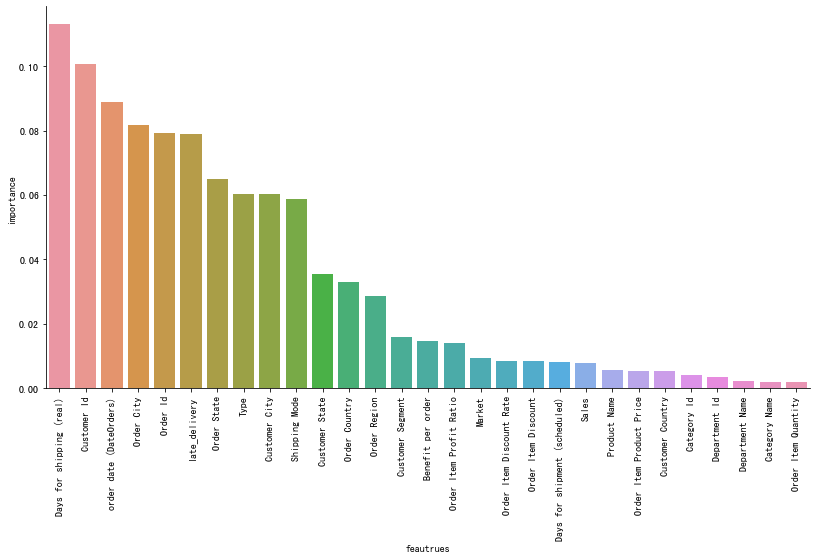

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt 
feat_importance=feat_importance.sort_values(by='importance',ascending=False)
sns.catplot(x='feautrues',y='importance',data=feat_importance,kind='bar',height=6, aspect=2)
plt.xticks(rotation=90)

In [94]:
######对销售额 以及销售数量进行预测#######
x_sale=train_data.loc[:,train_data.columns!='Sales']
y_sale=train_data['Sales']
x_sale
x_quantity=train_data.loc[:,train_data.columns!='Order Item Quantity']
y_quantity=train_data['Order Item Quantity']
x_quantity

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Department Id,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Sales,Order Region,Order State,Product Name,Shipping Mode,fraud,late_delivery
0,1,3,4,91.250000,73,40,66,1,20755,0,36,2,4,3,331,70,5961,77202,13.110000,0.04,327.750000,0.29,327.750000,15,475,78,3,0,0
1,3,5,4,-249.089996,73,40,66,1,19492,0,36,2,4,3,391,69,1147,75939,16.389999,0.05,327.750000,-0.80,327.750000,13,841,78,3,0,1
2,0,4,4,-247.779999,73,40,452,0,19491,0,5,2,4,3,391,69,1146,75938,18.030001,0.06,327.750000,-0.80,327.750000,13,841,78,3,0,0
3,1,3,4,22.860001,73,40,285,0,19490,2,5,2,4,3,3226,8,1145,75937,22.940001,0.07,327.750000,0.08,327.750000,11,835,78,3,0,0
4,2,2,4,134.210007,73,40,66,1,19489,1,36,2,4,3,3226,8,1144,75936,29.500000,0.09,327.750000,0.45,327.750000,11,835,78,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,45,18,59,0,1005,2,31,7,3,3,2922,31,1774,26043,0.000000,0.00,399.980011,0.10,399.980011,7,913,24,3,0,0
180515,1,3,2,-613.770019,45,18,26,0,9141,1,5,7,3,3,1362,77,1758,26037,4.000000,0.01,399.980011,-1.55,399.980011,7,770,24,2,0,1
180516,3,5,4,141.110001,45,18,55,0,291,1,7,7,3,3,25,8,1526,26024,8.000000,0.02,399.980011,0.36,399.980011,11,88,24,3,0,1
180517,2,3,4,186.229996,45,18,66,1,2813,0,36,7,3,3,25,8,1524,26022,12.000000,0.03,399.980011,0.48,399.980011,11,88,24,3,0,0


In [95]:
##切分数据集##
x_sale_train,x_sale_val,y_sale_train,y_sale_val=train_test_split(x_sale,y_sale,test_size=0.2)
x_quantity_train,x_quantity_val,y_quantity_train,y_quantity_val=train_test_split(x_quantity,y_quantity,test_size=0.2)

In [99]:
##模型评估函数##
from sklearn.metrics import mean_absolute_error,mean_squared_error

def regression_model_stats(model,x_train,x_test,y_train,y_test,model_name='Sales'):
    model=model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('Model used',model)
    
    mae=mean_absolute_error(y_pred,y_test)
    mse=mean_squared_error(y_pred,y_test)
    
    print('{} mae: {}% '.format(model_name,mae))
    print('{} mse: {}% '.format(model_name,mse))
    
    return mae,mse

In [105]:
##线性回归
from sklearn.linear_model import LinearRegression
model_sales=LinearRegression()
model_quantity=LinearRegression()

regression_model_stats(model_sales,x_sale_train,x_sale_val,y_sale_train,y_sale_val,model_name='Sales')
regression_model_stats(model_quantity,x_quantity_train,x_quantity_val,y_quantity_train,y_quantity_val,model_name='Quantity')

Model used LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Sales mae: 18.233077076549105% 
Sales mse: 941.716246962444% 
Model used LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Quantity mae: 0.3444492279550002% 
Quantity mse: 0.2779072240569914% 


(0.3444492279550002, 0.2779072240569914)

In [101]:
##lasso
from sklearn.linear_model import Lasso
model_sales=Lasso()
model_quantity=Lasso()

regression_model_stats(model_sales,x_sale_train,x_sale_val,y_sale_train,y_sale_val,model_name='Sales')
regression_model_stats(model_quantity,x_quantity_train,x_quantity_val,y_quantity_train,y_quantity_val,model_name='Quantity')

Model used Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Sales mae: 18.558228402376855% 
Sales mse: 1028.7499698152% 
Model used Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Quantity mae: 0.3614796037482243% 
Quantity mse: 0.2995296785709544% 


(0.3614796037482243, 0.2995296785709544)

In [106]:
model_sales

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
##Ridge
from sklearn.linear_model import Ridge
model_sales=Ridge()
model_quantity=Ridge()

regression_model_stats(model_sales,x_sale_train,x_sale_val,y_sale_train,y_sale_val,model_name='Sales')
regression_model_stats(model_quantity,x_quantity_train,x_quantity_val,y_quantity_train,y_quantity_val,model_name='Quantity')

Model used Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Sales mae: 18.228477934833442% 
Sales mse: 941.7076149427324% 
Model used Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Quantity mae: 0.34444922756223706% 
Quantity mse: 0.27790721670798374% 


(0.34444922756223706, 0.27790721670798374)

In [103]:
##决策树模型
model_sales=DecisionTreeRegressor()
model_quantity=DecisionTreeRegressor()

regression_model_stats(model_sales,x_sale_train,x_sale_val,y_sale_train,y_sale_val,model_name='Sales')
regression_model_stats(model_quantity,x_quantity_train,x_quantity_val,y_quantity_train,y_quantity_val,model_name='Quantity')

Model used DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Sales mae: 1.1559565280264869e-11% 
Sales mse: 2.893356503370565e-22% 
Model used DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Quantity mae: 0.0% 
Quantity mse: 0.0% 


(0.0, 0.0)

In [104]:
##lgb 模型
import lightgbm as lgb
model_sales=lgb.LGBMRegressor()
model_quantity=lgb.LGBMRegressor()

regression_model_stats(model_sales,x_sale_train,x_sale_val,y_sale_train,y_sale_val,model_name='Sales')
regression_model_stats(model_quantity,x_quantity_train,x_quantity_val,y_quantity_train,y_quantity_val,model_name='Quantity')


Model used LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Sales mae: 0.105433033810239% 
Sales mse: 0.7745847041908285% 
Model used LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Quantity 

(0.0003961041478873339, 5.876649589911847e-06)

In [ ]:
##随机森林##
model_sales=RandomForestRegressor()
model_quantity=RandomForestRegressor()

regression_model_stats(model_sales,x_sale_train,x_sale_val,y_sale_train,y_sale_val,model_name='Sales')
regression_model_stats(model_quantity,x_quantity_train,x_quantity_val,y_quantity_train,y_quantity_val,model_name='Quantity')